In [122]:
# Load Seurat object and create pseudobulk for MOFA analysis based on azimuth annotations

#############################################
# Prerequisites - Load Libraries

In [123]:
source('MS0_Libraries.r')

In [124]:
source('MS0_Libraries.r')

###############################################
# Preqrequisites Configurations & Parameters

In [134]:
data_path = '../data/current'

In [135]:
result_path =  '../results/current'

In [137]:
libraries = c('L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10','L11', 'L12', 'L13', 'L14')

# Load Data 

## Load Seurat object

In [138]:
### Raw data counts
# contains raw count matrix filtered on only Singlets for all genes (~19.000)

In [139]:
###### Load the generated seurat objects

source_text = paste( data_path, '/analysis/B/B6_DE_Integrated_Singlet_processed_rna.h5seurat', sep = '')
print(source_text)
print(file.info(source_text)$mtime)
rna_seurat_data = LoadH5Seurat(source_text, assays = "RNA", quietly = TRUE )


[1] "/groups/umcg-franke-scrna/tmp01/users/umcg-closert/stemi/data/results//analysis/B/B6_DE_Integrated_Singlet_processed_rna.h5seurat"
[1] "2023-04-27 14:38:03 UTC"


Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding scale.data for RNA

Adding feature-level metadata for RNA

Adding command information

Adding cell-level metadata



In [140]:
rna_seurat_data_raw = rna_seurat_data

In [141]:
### Decide what to use as input

In [142]:
rna_seurat_data = rna_seurat_data

In [143]:
### Further data checks

In [144]:
head(colSums(x = rna_seurat_data, slot = "counts") )  # raw count values from original matrix

AAACCCACATACAGGG-1-L1 AAACCCACATGACTTG-1-L1 AAACCCAGTCATCAGT-1-L1 
                 3947                  5870                  3888 
AAACCCAGTGGTAATA-1-L1 AAACCCATCATCACAG-1-L1 AAACCCATCGATGGAG-1-L1 
                 5094                 17310                  4839

In [145]:
# str(rna_seurat_data)

In [146]:
head(rna_seurat_data$nCount_HTO) # get a column of the observation matrix

AAACCCACATACAGGG-1-L1 AAACCCACATGACTTG-1-L1 AAACCCAGTCATCAGT-1-L1 
                 1574                   379                   421 
AAACCCAGTGGTAATA-1-L1 AAACCCATCATCACAG-1-L1 AAACCCATCGATGGAG-1-L1 
                  478                   851                   473

In [147]:
#head(rna_seurat_data$classification) # get a column of the observation matrix

In [148]:
colnames(rna_seurat_data[[]])

[1] "nCount_HTO"                         "B2_Scanorama_Singlet_cluster"      
 [3] "B2_Scanorama_Singlet_rb_mt_cluster" "cell_type_Scanorama"               
 [5] "cluster_cell_type_Scanorama"        "classification_measurement"        
 [7] "delta_ef_value_group_measurement"   "m_y"                               
 [9] "measurement_y"                      "delta_ef_value_group"              
[11] "delta_ef_value"                     "sample_y"                          
[13] "age"                                "sex"                               
[15] "m_x"                                "classification"                    
[17] "group_y"                            "measurement_x"                     
[19] "sample_x"                           "library"                           
[21] "id"                                 "read"                              
[23] "pattern"                            "sequence"                          
[25] "feature_type"                       "in_sample"                         
[27] "display_name"                       "group_x"

In [149]:
head(rna_seurat_data[[]])   # get complete observation matrix 

,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,delta_ef_value_group,⋯,sample_x,library,id,read,pattern,sequence,feature_type,in_sample,display_name,group_x
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
AAACCCACATACAGGG-1-L1,1574,8,8,B-cell,8_B-cell,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,9.1,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1
AAACCCACATGACTTG-1-L1,379,9,9,Monocytes - CD16_FCGR3A,9_Monocytes - CD16_FCGR3A,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,9.1,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1
AAACCCAGTCATCAGT-1-L1,421,5,5,T-cell-CD4,5_T-cell-CD4,acs_w_o_infection_TP1,x_smaller_1_TP1,"M7 (0,75)",TP1,x_smaller_1,⋯,7.1,L1,HTO_B0257,R2,5PNNNNNNNNNN(BC),TGTCTTTCCTGCCAG,Antibody Capture,1,7.1,TP1
AAACCCAGTGGTAATA-1-L1,478,0,0,T-cell-CD4,0_T-cell-CD4,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,9.1,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1
AAACCCATCATCACAG-1-L1,851,16,16,Plasma Blast,16_Plasma Blast,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,9.1,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1
AAACCCATCGATGGAG-1-L1,473,0,0,T-cell-CD4,0_T-cell-CD4,acs_subacute_TP1,missing,missing,missing,missing,⋯,8.1,L1,HTO_B0258,R2,5PNNNNNNNNNN(BC),CTCCTCTGCAATTAC,Antibody Capture,1,8.1,TP1


In [150]:
dim(rna_seurat_data@assays$RNA@scale.data)

[1]   1392 148275

In [151]:
head(GetAssayData(rna_seurat_data, slot = "scale.data"))

,AAACCCACATACAGGG-1-L1,AAACCCACATGACTTG-1-L1,AAACCCAGTCATCAGT-1-L1,AAACCCAGTGGTAATA-1-L1,AAACCCATCATCACAG-1-L1,AAACCCATCGATGGAG-1-L1,AAACCCATCTTGCAGA-1-L1,AAACGAAAGAACTTCC-1-L1,AAACGAAAGGGTACGT-1-L1,AAACGAAAGGGTCTTT-1-L1,⋯,TTTGGTTTCTGTACAG-1-L14,TTTGTTGAGCTCCACG-1-L14,TTTGTTGAGTCAGCCC-1-L14,TTTGTTGCACAAATAG-1-L14,TTTGTTGCAGAGCCCT-1-L14,TTTGTTGCAGGTTCGC-1-L14,TTTGTTGGTACCTAGT-1-L14,TTTGTTGGTACGTTCA-1-L14,TTTGTTGGTGGACCAA-1-L14,TTTGTTGTCGAAGAAT-1-L14
HES4,-0.2458351,5.2755065,-0.1659243,-0.2529775,-0.64255089,-0.2226176,-0.1294657,-0.3032477,5.0691404,-0.2307047,⋯,-0.2238024,-0.2566660,-0.1094798,-0.2565409,-0.3618868,-0.3595781,-0.2898208,-0.2445270,-0.66771084,-0.2764359
ISG15,-0.5671435,-0.6356693,-0.6192396,-0.6269512,-0.38615820,-0.6335911,1.2474985,-0.5369599,0.4149888,-0.6072676,⋯,1.5472746,1.1737832,1.0967059,-0.7113699,-0.8093281,0.3909281,-0.7160870,-0.5755023,1.70855975,1.5406628
TNFRSF18,-0.2080559,-0.1850859,-0.2253351,3.7579303,-0.04953691,-0.2080265,-0.2338105,-0.1949285,-0.1594944,-0.2083495,⋯,-0.2039024,-0.1873443,-0.2356623,-0.1908602,-0.1516817,-0.1588946,-0.1810645,-0.2076000,-0.04253671,-0.2055351
TNFRSF4,-0.1991221,-0.2098920,-0.2507233,-0.2237158,-0.27779725,-0.2373614,-0.2715408,-0.1653312,-0.2340275,-0.2226019,⋯,-0.2544025,-0.2766939,-0.2958161,-0.2607138,-0.2681839,-0.2387677,-0.2511905,-0.2033674,-0.26873145,-0.1605054
AL645728.1,-0.2744859,-0.2990338,-0.2319598,-0.2744958,-0.44214112,-0.2591127,-0.2129115,-0.3046129,-0.3214925,-0.2646544,⋯,-0.2574319,-0.2692729,-0.2007998,-0.2712910,-0.3175532,2.2594626,-0.2874482,3.8196340,1.03018486,-0.2932183
MIB2,-0.3938878,-0.3809605,-0.4023549,2.0574462,-0.30458272,-0.3930661,2.5170703,-0.3873412,1.4148629,2.2514246,⋯,-0.3904268,-0.3808021,-0.4071151,1.6874684,1.2390401,-0.3658706,1.5971848,-0.3935464,0.71125776,-0.3933075


In [152]:
DefaultAssay(rna_seurat_data)

[1] "RNA"

In [158]:
rna_seurat_data

An object of class Seurat 
19221 features across 148275 samples within 1 assay 
Active assay: RNA (19221 features, 0 variable features)

## Azimuth Annotation File

In [159]:
azimuth_annotation = read.csv(paste0(data_path, '/analysis/G/G2_Cell_Annotations_Azimuth.csv'))

In [160]:
azimuth_annotation$cell_library = paste0(azimuth_annotation$cell, '-', azimuth_annotation$library)

In [161]:
### Combine B-cell annotations:
azimuth_annotation$predicted.celltype.l2 = str_replace(azimuth_annotation$predicted.celltype.l2 ,
                                                       'B naive|B memory|B intermediate', 'B cell')

In [162]:
### Define cell-type to use in the end

In [163]:
total_azimuth_filter = azimuth_annotation %>% group_by(predicted.celltype.l2) %>% dplyr::count()

In [164]:
total_azimuth_filter = total_azimuth_filter[total_azimuth_filter$n > 1000,c('predicted.celltype.l2')]

In [165]:
#total_azimuth_filter

In [166]:
head(azimuth_annotation,2)

,X,nCount_RNA,nFeature_RNA,predicted.celltype.l2,predicted.celltype.l2.score,library,cell,cell_library
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,AAACCCACATACAGGG-1,3947,1232,B cell,0.9668187,L1,AAACCCACATACAGGG-1,AAACCCACATACAGGG-1-L1
2,AAACCCACATGACTTG-1,5871,1890,CD16 Mono,1.0000000,L1,AAACCCACATGACTTG-1,AAACCCACATGACTTG-1-L1


In [167]:
azimuth_mapping = read.csv(paste0(result_path, '/Reproduction/azimuth_roy_mapping.csv'))

In [168]:
azimuth_mapping = azimuth_mapping[azimuth_mapping$annot != '',]

In [169]:
head(azimuth_mapping,2)

,annot_roy,annot
,<chr>,<chr>
2,B_intermediate,B intermediate
3,B_memory,B memory


# Data Processing

## Subset data

In [170]:
dim(rna_seurat_data)

[1]  19221 148275

In [171]:
rna_seurat_data_subset = rna_seurat_data

In [174]:
dim(rna_seurat_data_subset)

[1]  19221 148275

## Define columns for aggregation to pseudobulk + data type conversions

In [176]:
sample_column = 'display_name' # to be sample-id

In [177]:
cluster_column =  'predicted.celltype.l2' # to be cluster_id

In [178]:
obs = rna_seurat_data_subset@meta.data

In [179]:
obs$cell = rownames(obs)

In [180]:
head(obs)

,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,delta_ef_value_group,⋯,library,id,read,pattern,sequence,feature_type,in_sample,display_name,group_x,cell
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>
AAACCCACATACAGGG-1-L1,1574,8,8,B-cell,8_B-cell,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCACATACAGGG-1-L1
AAACCCACATGACTTG-1-L1,379,9,9,Monocytes - CD16_FCGR3A,9_Monocytes - CD16_FCGR3A,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCACATGACTTG-1-L1
AAACCCAGTCATCAGT-1-L1,421,5,5,T-cell-CD4,5_T-cell-CD4,acs_w_o_infection_TP1,x_smaller_1_TP1,"M7 (0,75)",TP1,x_smaller_1,⋯,L1,HTO_B0257,R2,5PNNNNNNNNNN(BC),TGTCTTTCCTGCCAG,Antibody Capture,1,7.1,TP1,AAACCCAGTCATCAGT-1-L1
AAACCCAGTGGTAATA-1-L1,478,0,0,T-cell-CD4,0_T-cell-CD4,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCAGTGGTAATA-1-L1
AAACCCATCATCACAG-1-L1,851,16,16,Plasma Blast,16_Plasma Blast,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCATCATCACAG-1-L1
AAACCCATCGATGGAG-1-L1,473,0,0,T-cell-CD4,0_T-cell-CD4,acs_subacute_TP1,missing,missing,missing,missing,⋯,L1,HTO_B0258,R2,5PNNNNNNNNNN(BC),CTCCTCTGCAATTAC,Antibody Capture,1,8.1,TP1,AAACCCATCGATGGAG-1-L1


In [181]:
colnames(obs)

[1] "nCount_HTO"                         "B2_Scanorama_Singlet_cluster"      
 [3] "B2_Scanorama_Singlet_rb_mt_cluster" "cell_type_Scanorama"               
 [5] "cluster_cell_type_Scanorama"        "classification_measurement"        
 [7] "delta_ef_value_group_measurement"   "m_y"                               
 [9] "measurement_y"                      "delta_ef_value_group"              
[11] "delta_ef_value"                     "sample_y"                          
[13] "age"                                "sex"                               
[15] "m_x"                                "classification"                    
[17] "group_y"                            "measurement_x"                     
[19] "sample_x"                           "library"                           
[21] "id"                                 "read"                              
[23] "pattern"                            "sequence"                          
[25] "feature_type"                       "in_sample"                         
[27] "display_name"                       "group_x"                           
[29] "cell"

In [182]:
obs$library = as.character(obs$library)

In [183]:
obs$group_id = as.character(obs[['in_sample']]) ## group-id neede in DE analysis, here not --> DUMMY Variable

In [184]:
obs$sample_id   = paste0(as.character(obs[[sample_column]] ), '-', obs$library)

In [185]:
## add azimuth annotation


In [186]:
head(azimuth_annotation,2)

,X,nCount_RNA,nFeature_RNA,predicted.celltype.l2,predicted.celltype.l2.score,library,cell,cell_library
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,AAACCCACATACAGGG-1,3947,1232,B cell,0.9668187,L1,AAACCCACATACAGGG-1,AAACCCACATACAGGG-1-L1
2,AAACCCACATGACTTG-1,5871,1890,CD16 Mono,1.0000000,L1,AAACCCACATGACTTG-1,AAACCCACATGACTTG-1-L1


In [187]:
obs = merge(obs, azimuth_annotation[,c( 'predicted.celltype.l2','cell_library' )], by.x = 'cell', by.y = 'cell_library' )

In [188]:
nrow(obs)

[1] 148275

In [189]:
head(obs,2)

,cell,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,⋯,read,pattern,sequence,feature_type,in_sample,display_name,group_x,group_id,sample_id,predicted.celltype.l2
,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>
1,AAACCCAAGAAGGGAT-1-L10,261,2,2,T-cell-CD4,2_T-cell-CD4,acs_w_o_infection_TP4,x_smaller_0_TP4,"M3 (-0,06)",TP4,⋯,R2,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture,1,3.4,TP4,1,3.4-L10,CD4 TCM
2,AAACCCAAGACAGCGT-1-L4,1410,3,3,NK,3_NK,acs_w_o_infection_TP2,x_greater_1_TP2,"M2 (1,15)",TP2,⋯,R2,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture,1,2.2,TP2,1,2.2-L4,NK


In [190]:
obs$cluster_id = as.character(obs[[cluster_column]])

In [191]:
rownames(obs) = obs$cell

In [193]:
unique(obs$predicted.celltype.l2)

[1] "CD4 TCM"           "NK"                "CD14 Mono"        
 [4] "B cell"            "MAIT"              "CD8 TEM"          
 [7] "NK_CD56bright"     "ILC"               "CD4 Naive"        
[10] "CD4 CTL"           "CD16 Mono"         "cDC2"             
[13] "cDC1"              "CD4 TEM"           "Treg"             
[16] "CD8 Naive"         "gdT"               "Plasmablast"      
[19] "Platelet"          "CD8 TCM"           "HSPC"             
[22] "pDC"               "dnT"               "NK Proliferating" 
[25] "Doublet"           "CD4 Proliferating" "Eryth"            
[28] "ASDC"              "CD8 Proliferating"

In [194]:
head(obs,2)

,cell,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,⋯,pattern,sequence,feature_type,in_sample,display_name,group_x,group_id,sample_id,predicted.celltype.l2,cluster_id
,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>
AAACCCAAGAAGGGAT-1-L10,AAACCCAAGAAGGGAT-1-L10,261,2,2,T-cell-CD4,2_T-cell-CD4,acs_w_o_infection_TP4,x_smaller_0_TP4,"M3 (-0,06)",TP4,⋯,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture,1,3.4,TP4,1,3.4-L10,CD4 TCM,CD4 TCM
AAACCCAAGACAGCGT-1-L4,AAACCCAAGACAGCGT-1-L4,1410,3,3,NK,3_NK,acs_w_o_infection_TP2,x_greater_1_TP2,"M2 (1,15)",TP2,⋯,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture,1,2.2,TP2,1,2.2-L4,NK,NK


In [195]:
colnames(obs)

[1] "cell"                               "nCount_HTO"                        
 [3] "B2_Scanorama_Singlet_cluster"       "B2_Scanorama_Singlet_rb_mt_cluster"
 [5] "cell_type_Scanorama"                "cluster_cell_type_Scanorama"       
 [7] "classification_measurement"         "delta_ef_value_group_measurement"  
 [9] "m_y"                                "measurement_y"                     
[11] "delta_ef_value_group"               "delta_ef_value"                    
[13] "sample_y"                           "age"                               
[15] "sex"                                "m_x"                               
[17] "classification"                     "group_y"                           
[19] "measurement_x"                      "sample_x"                          
[21] "library"                            "id"                                
[23] "read"                               "pattern"                           
[25] "sequence"                           "feature_type"                      
[27] "in_sample"                          "display_name"                      
[29] "group_x"                            "group_id"                          
[31] "sample_id"                          "predicted.celltype.l2"             
[33] "cluster_id"

In [196]:
## Adding

In [197]:
# obs[,'library', drop = FALSE]

In [198]:
rna_seurat_data_subset = AddMetaData(object = rna_seurat_data_subset, metadata = obs[,'library', drop = FALSE], col.name = 'library_char')

In [199]:
## group-id  ### OLD

In [200]:
rna_seurat_data_subset = AddMetaData(object = rna_seurat_data_subset, metadata = obs[,'group_id', drop = FALSE], col.name = 'group_id')

In [201]:
## cluster-id

In [202]:
rna_seurat_data_subset = AddMetaData(object = rna_seurat_data_subset, metadata = obs[,'cluster_id', drop = FALSE], col.name = 'cluster_id')

In [203]:
## sample-id

In [204]:
rna_seurat_data_subset = AddMetaData(object = rna_seurat_data_subset, metadata = obs[,'sample_id', drop = FALSE], col.name = 'sample_id')

In [205]:
head(rna_seurat_data_subset@meta.data)

,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,delta_ef_value_group,⋯,pattern,sequence,feature_type,in_sample,display_name,group_x,library_char,group_id,cluster_id,sample_id
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>
AAACCCACATACAGGG-1-L1,1574,8,8,B-cell,8_B-cell,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,L1,1,B cell,9.1-L1
AAACCCACATGACTTG-1-L1,379,9,9,Monocytes - CD16_FCGR3A,9_Monocytes - CD16_FCGR3A,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,L1,1,CD16 Mono,9.1-L1
AAACCCAGTCATCAGT-1-L1,421,5,5,T-cell-CD4,5_T-cell-CD4,acs_w_o_infection_TP1,x_smaller_1_TP1,"M7 (0,75)",TP1,x_smaller_1,⋯,5PNNNNNNNNNN(BC),TGTCTTTCCTGCCAG,Antibody Capture,1,7.1,TP1,L1,1,CD4 TCM,7.1-L1
AAACCCAGTGGTAATA-1-L1,478,0,0,T-cell-CD4,0_T-cell-CD4,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,L1,1,CD4 TCM,9.1-L1
AAACCCATCATCACAG-1-L1,851,16,16,Plasma Blast,16_Plasma Blast,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,L1,1,Plasmablast,9.1-L1
AAACCCATCGATGGAG-1-L1,473,0,0,T-cell-CD4,0_T-cell-CD4,acs_subacute_TP1,missing,missing,missing,missing,⋯,5PNNNNNNNNNN(BC),CTCCTCTGCAATTAC,Antibody Capture,1,8.1,TP1,L1,1,CD4 TCM,8.1-L1


In [206]:
## Short check whether merging worked fine

In [207]:
### Save merged Seurat data with azimuth annotation for reproduction file to share

In [208]:
#save( rna_seurat_data_subset , file = paste0(result_path, '/G-Analysis/G4_Seurat_Input_Replication.RDS'))

In [209]:
rna_seurat_data_save = rna_seurat_data_subset

In [210]:
colnames(rna_seurat_data_save[[]])

[1] "nCount_HTO"                         "B2_Scanorama_Singlet_cluster"      
 [3] "B2_Scanorama_Singlet_rb_mt_cluster" "cell_type_Scanorama"               
 [5] "cluster_cell_type_Scanorama"        "classification_measurement"        
 [7] "delta_ef_value_group_measurement"   "m_y"                               
 [9] "measurement_y"                      "delta_ef_value_group"              
[11] "delta_ef_value"                     "sample_y"                          
[13] "age"                                "sex"                               
[15] "m_x"                                "classification"                    
[17] "group_y"                            "measurement_x"                     
[19] "sample_x"                           "library"                           
[21] "id"                                 "read"                              
[23] "pattern"                            "sequence"                          
[25] "feature_type"                       "in_sample"                         
[27] "display_name"                       "group_x"                           
[29] "library_char"                       "group_id"                          
[31] "cluster_id"                         "sample_id"

In [211]:
#unique(rna_seurat_data_save$sample_id)

In [212]:
rna_seurat_data_save$B2_Scanorama_Singlet_cluster = NULL
rna_seurat_data_save$B2_Scanorama_Singlet_rb_mt_cluster = NULL
rna_seurat_data_save$cell_type_Scanorama = NULL
rna_seurat_data_save$cluster_cell_type_Scanorama = NULL

In [213]:
rna_seurat_data_save$delta_ef_value_group_measurement = NULL
rna_seurat_data_save$m_y = NULL
rna_seurat_data_save$measurement_y = NULL
rna_seurat_data_save$delta_ef_value_group = NULL

In [214]:
rna_seurat_data_save$classification_measurement = NULL
rna_seurat_data_save$delta_ef_value = NULL
rna_seurat_data_save$sample_y = NULL
rna_seurat_data_save$age = NULL

In [215]:
rna_seurat_data_save$sex = NULL
rna_seurat_data_save$m_x = NULL
rna_seurat_data_save$classification = NULL
rna_seurat_data_save$group_y = NULL

In [216]:
rna_seurat_data_save$measurement_x = NULL
rna_seurat_data_save$sample_x = NULL
rna_seurat_data_save$library = NULL
rna_seurat_data_save$id = NULL

In [217]:
rna_seurat_data_save$read = NULL
rna_seurat_data_save$pattern = NULL
rna_seurat_data_save$sequence = NULL
rna_seurat_data_save$feature_type = NULL

In [218]:
rna_seurat_data_save$in_sample = NULL
rna_seurat_data_save$display_name = NULL
rna_seurat_data_save$group_x = NULL
rna_seurat_data_save$library_char = NULL

In [219]:
colnames(rna_seurat_data_save[[]])

[1] "nCount_HTO" "group_id"   "cluster_id" "sample_id"

In [220]:
unique(rna_seurat_data_save$cluster_id)

[1] "B cell"            "CD16 Mono"         "CD4 TCM"          
 [4] "Plasmablast"       "CD8 TEM"           "CD4 Naive"        
 [7] "CD14 Mono"         "Treg"              "CD4 TEM"          
[10] "NK"                "CD8 Naive"         "cDC2"             
[13] "dnT"               "MAIT"              "HSPC"             
[16] "gdT"               "Platelet"          "CD8 TCM"          
[19] "NK_CD56bright"     "CD4 CTL"           "cDC1"             
[22] "pDC"               "CD4 Proliferating" "NK Proliferating" 
[25] "ILC"               "Doublet"           "CD8 Proliferating"
[28] "ASDC"              "Eryth"

In [221]:
#SaveH5Seurat(rna_seurat_data_save, file = paste0(result_path, '/Reproduction/G4_Seurat_Input_Replication.h5seurat'), overwrite = TRUE)

## Convert to SCE 

In [222]:
rna_sce = as.SingleCellExperiment(rna_seurat_data_subset)

In [223]:
rna_sce  # rows = genes; columns = cells

class: SingleCellExperiment 
dim: 19221 148275 
metadata(0):
assays(2): counts logcounts
rownames(19221): AL627309.1 AL627309.4 ... AC004556.1 AC240274.1
rowData names(0):
colnames(148275): AAACCCACATACAGGG-1-L1 AAACCCACATGACTTG-1-L1 ...
  TTTGTTGGTGGACCAA-1-L14 TTTGTTGTCGAAGAAT-1-L14
colData names(33): nCount_HTO B2_Scanorama_Singlet_cluster ...
  sample_id ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [224]:
### Check amount of cells per sample and cluster

In [225]:
colSums(table(rna_sce$cluster_id,rna_sce$cluster_id ))

ASDC            B cell         CD14 Mono         CD16 Mono 
                8              9829             32727              4680 
          CD4 CTL         CD4 Naive CD4 Proliferating           CD4 TCM 
             2346              6495               108             45102 
          CD4 TEM         CD8 Naive CD8 Proliferating           CD8 TCM 
             6296              2612                13               525 
          CD8 TEM              cDC1              cDC2               dnT 
            10611                83              1314               130 
          Doublet             Eryth               gdT              HSPC 
               48                 6              1901               332 
              ILC              MAIT                NK  NK Proliferating 
              931              1177             15699               168 
    NK_CD56bright               pDC       Plasmablast          Platelet 
              874               745               703               450 
             Treg 
             2362

In [226]:
cells_per_sample_cluster = t(table(rna_sce$cluster_id, rna_sce$sample_id))

In [227]:
head(as.data.frame(cells_per_sample_cluster),2)

,Var1,Var2,Freq
,<fct>,<fct>,<int>
1,1.1-L1,ASDC,0
2,10-L11,ASDC,0


In [228]:
write.csv(cells_per_sample_cluster, paste0(result_path, '/G-Analysis/G1_Cell_Sample_Cluster_Distribution.csv'))

In [229]:
cells_per_sample_cluster = data.frame(cells_per_sample_cluster)

In [230]:
head(cells_per_sample_cluster,2)

,Var1,Var2,Freq
,<fct>,<fct>,<int>
1,1.1-L1,ASDC,0
2,10-L11,ASDC,0


In [231]:
head(cells_per_sample_cluster %>% group_by(Var2) %>% summarise(amount_cells = sum(Freq)),5)

Var2,amount_cells
<fct>,<int>
ASDC,8
B cell,9829
CD14 Mono,32727
CD16 Mono,4680
CD4 CTL,2346


In [232]:
colnames(cells_per_sample_cluster) = c('Sample', 'Cluster_Cell_Type', 'amount_cells')

In [233]:
cells_per_sample_cluster$amount_cells_cat[(cells_per_sample_cluster$amount_cells <= 3)  ] = '0-3'

In [234]:
cells_per_sample_cluster$amount_cells_cat[(cells_per_sample_cluster$amount_cells <= 10)  & (cells_per_sample_cluster$amount_cells >3 )] = '3-10'

In [235]:
cells_per_sample_cluster$amount_cells_cat[(cells_per_sample_cluster$amount_cells <= 20)  & (cells_per_sample_cluster$amount_cells >10 )] = '10-20'

In [236]:
cells_per_sample_cluster$amount_cells_cat[(cells_per_sample_cluster$amount_cells <= 50)  & (cells_per_sample_cluster$amount_cells >20 )] = '20-50'

In [237]:
cells_per_sample_cluster$amount_cells_cat[(cells_per_sample_cluster$amount_cells > 50)  ] = '> 50'

In [238]:
sample_class = unique(obs[,c('classification', 'sample_id')])

In [239]:
cells_per_sample_cluster = merge(cells_per_sample_cluster, sample_class, by.x = 'Sample', by.y = 'sample_id')

In [240]:
head(cells_per_sample_cluster,2)

,Sample,Cluster_Cell_Type,amount_cells,amount_cells_cat,classification
,<fct>,<fct>,<int>,<chr>,<fct>
1,1.1-L1,ASDC,0,0-3,acs_subacute
2,1.1-L1,B cell,50,20-50,acs_subacute


In [241]:
cells_per_sample_cluster$cell_type = str_replace(cells_per_sample_cluster$Cluster_Cell_Type, '\\d.*_', '')

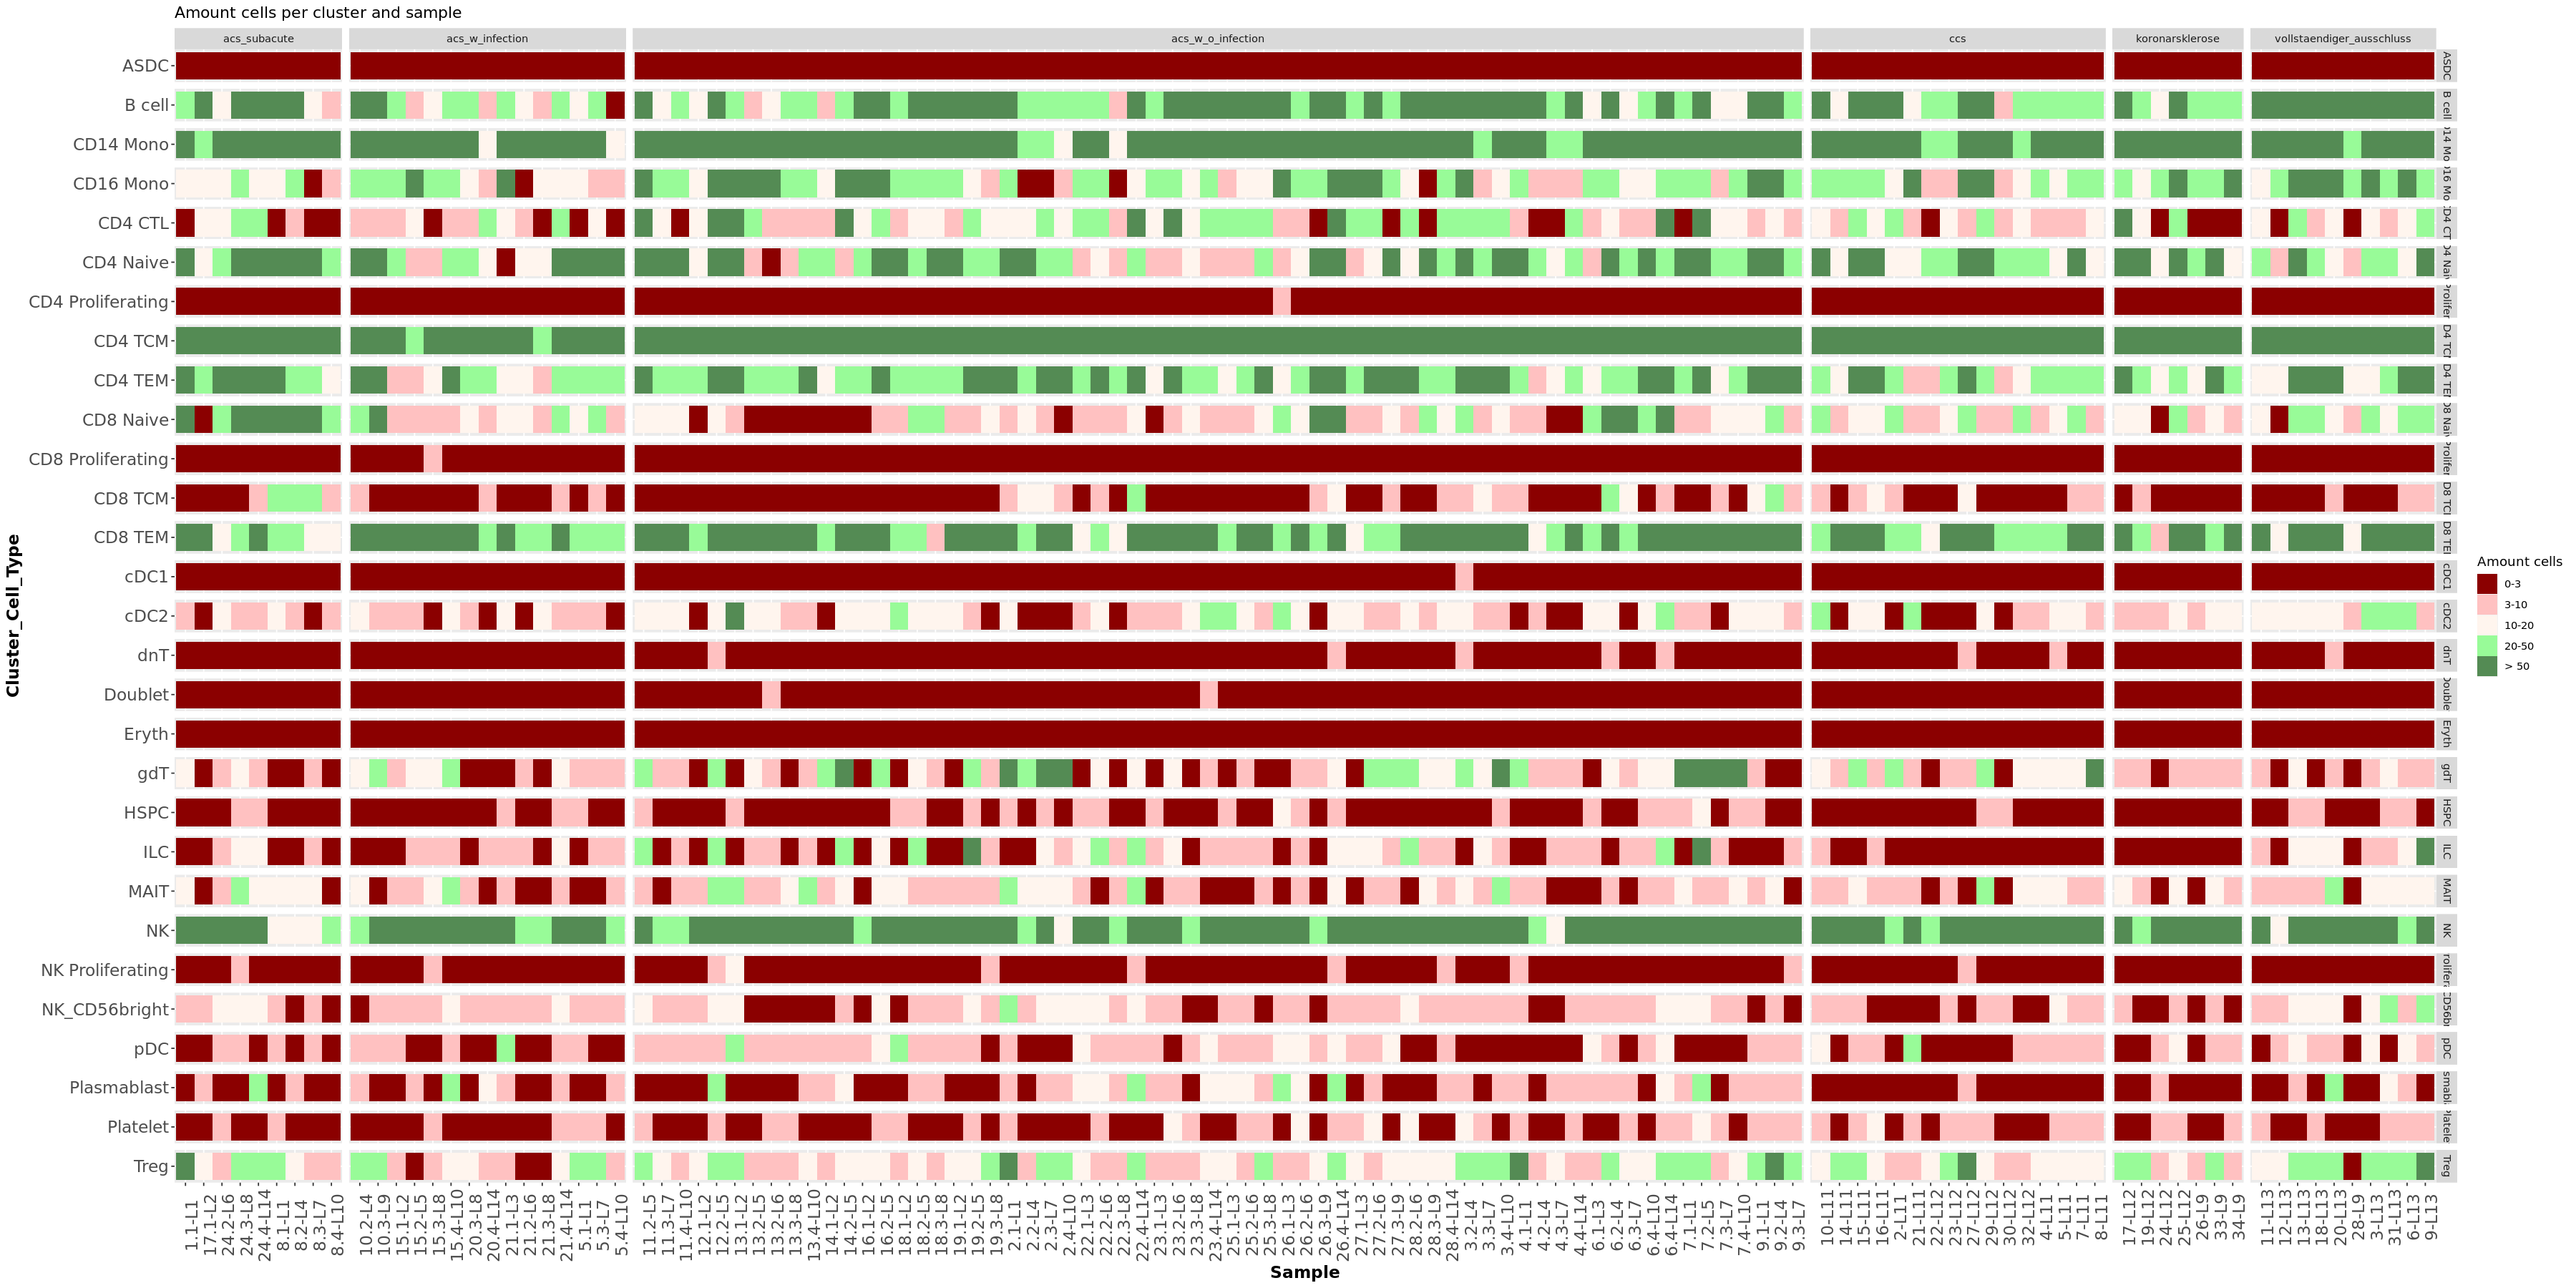

In [242]:
options(repr.plot.width=30, repr.plot.height=15)
g = ggplot(cells_per_sample_cluster, aes(Sample, Cluster_Cell_Type, fill= amount_cells_cat)) + facet_grid(cell_type ~ classification , scales = "free", space = "free") + geom_tile()   + ggtitle(label = "Amount cells per cluster and sample")+ theme(axis.text.x=element_text(size=14, angle = 90), axis.text.y=element_text(size=14, angle = 0),axis.title=element_text(size=14,face="bold")) + scale_fill_manual(name = "Amount cells", breaks=c( '0-3','3-10', 
                                 '10-20', '20-50', '> 50'), values =c("red4","rosybrown1",  "seashell", "palegreen", "palegreen4")) 
g

In [243]:
head(cells_per_sample_cluster,2)

,Sample,Cluster_Cell_Type,amount_cells,amount_cells_cat,classification,cell_type
,<fct>,<fct>,<int>,<chr>,<fct>,<chr>
1,1.1-L1,ASDC,0,0-3,acs_subacute,ASDC
2,1.1-L1,B cell,50,20-50,acs_subacute,B cell


## Analyze gene expression percentages per cluster

In [244]:
gene_list = list()

In [245]:
gene_cell_expr = list()

In [246]:
clusters = unique(rna_sce$cluster_id)
#clusters = unique(rna_sce$cell_type_Scanorama)

In [247]:
clusters

[1] "B cell"            "CD16 Mono"         "CD4 TCM"          
 [4] "Plasmablast"       "CD8 TEM"           "CD4 Naive"        
 [7] "CD14 Mono"         "Treg"              "CD4 TEM"          
[10] "NK"                "CD8 Naive"         "cDC2"             
[13] "dnT"               "MAIT"              "HSPC"             
[16] "gdT"               "Platelet"          "CD8 TCM"          
[19] "NK_CD56bright"     "CD4 CTL"           "cDC1"             
[22] "pDC"               "CD4 Proliferating" "NK Proliferating" 
[25] "ILC"               "Doublet"           "CD8 Proliferating"
[28] "ASDC"              "Eryth"

In [248]:
 for(i in clusters){
#    print(i)
    
    # subset data on cluster
    rna_sce_subset = rna_sce[,rna_sce$cluster_id== i] # cluster
    # rna_sce_subset = rna_sce[,rna_sce$cell_type_Scanorama == i]  # cell-type
    
    amount_cells = dim(rna_sce_subset)[2]
    
    # Calculate percentage of cells expressing gene
    amount_cells_expressing_gene = rowSums(assay(rna_sce_subset) > 0 )
    perc_cells_expressing_gene = (amount_cells_expressing_gene/ amount_cells) * 100
    
#    hist(perc_cells_expressing_gene)
    
    gene_cell_expr[[i]] = data.frame(perc_cells_expressing_gene = perc_cells_expressing_gene, total_amount_cells_expressing_gene = amount_cells_expressing_gene)
    
    #gene_list[[i]] = names(perc_cells_expressing_gene[perc_cells_expressing_gene > subset_threshold])
    }

In [249]:
 ### Resulting amount of genes per cluster

In [250]:
#sort(unlist(lapply(gene_list, function(x){length(x)})))

In [251]:
gene_cell_expr_data = data.frame()

In [252]:
 head(gene_cell_expr[[i]])

,perc_cells_expressing_gene,total_amount_cells_expressing_gene
,<dbl>,<int>
AL627309.1,0,0
AL627309.4,0,0
AL669831.5,0,0
FAM87B,0,0
LINC00115,0,0
FAM41C,0,0


In [253]:
 names(gene_cell_expr[[i]])

[1] "perc_cells_expressing_gene"         "total_amount_cells_expressing_gene"

In [254]:
 for(i in names(gene_cell_expr)){
    data = gene_cell_expr[[i]]
    data$gene = rownames(gene_cell_expr[[i]])
    data$cluster = i
    gene_cell_expr_data = rbind( gene_cell_expr_data, data)
    }

In [255]:
head(gene_cell_expr_data,2)

,perc_cells_expressing_gene,total_amount_cells_expressing_gene,gene,cluster
,<dbl>,<int>,<chr>,<chr>
AL627309.1,0.23400142,23,AL627309.1,B cell
AL627309.4,0.06104385,6,AL627309.4,B cell


In [256]:
write.csv(gene_cell_expr_data, paste0(result_path, '/G-Analysis/G0_Filter_Genes_Input_Correlations_Perc_Values', '.csv'))

## Add cluster, group and sample columns for aggregation

In [258]:
#### Add cluster_id, sample_id and group_id columns
(rna_sce <- prepSCE(rna_sce, 
    kid = 'cluster_id', # subpopulation assignments
    gid = 'group_id',  # group IDs (ctrl/stim)   # sample_id; using dummy sample id which corresponds to cluster columns
    sid = 'sample_id',   # sample IDs (ctrl/stim.1234)
    drop = FALSE))  # drop all other colData columns

class: SingleCellExperiment 
dim: 19221 148275 
metadata(1): experiment_info
assays(2): counts logcounts
rownames(19221): AL627309.1 AL627309.4 ... AC004556.1 AC240274.1
rowData names(0):
colnames(148275): AAACCCACATACAGGG-1-L1 AAACCCACATGACTTG-1-L1 ...
  TTTGTTGGTGGACCAA-1-L14 TTTGTTGTCGAAGAAT-1-L14
colData names(33): cluster_id sample_id ... library_char ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [259]:
nk <- length(kids <- levels(rna_sce$cluster_id))
ns <- length(sids <- levels(rna_sce$sample_id))
names(kids) <- kids; names(sids) <- sids

In [260]:
nk # amount of cluster

[1] 29

In [261]:
ns # amount of samples

[1] 121

In [262]:
kids  # cluster ids

ASDC              B cell           CD14 Mono           CD16 Mono 
             "ASDC"            "B cell"         "CD14 Mono"         "CD16 Mono" 
            CD4 CTL           CD4 Naive   CD4 Proliferating             CD4 TCM 
          "CD4 CTL"         "CD4 Naive" "CD4 Proliferating"           "CD4 TCM" 
            CD4 TEM           CD8 Naive   CD8 Proliferating             CD8 TCM 
          "CD4 TEM"         "CD8 Naive" "CD8 Proliferating"           "CD8 TCM" 
            CD8 TEM                cDC1                cDC2                 dnT 
          "CD8 TEM"              "cDC1"              "cDC2"               "dnT" 
            Doublet               Eryth                 gdT                HSPC 
          "Doublet"             "Eryth"               "gdT"              "HSPC" 
                ILC                MAIT                  NK    NK Proliferating 
              "ILC"              "MAIT"                "NK"  "NK Proliferating" 
      NK_CD56bright                 pDC         Plasmablast            Platelet 
    "NK_CD56bright"               "pDC"       "Plasmablast"          "Platelet" 
               Treg 
             "Treg"

In [263]:
length(kids) # amount cluster-id

[1] 29

In [265]:
names(colData(rna_sce))

[1] "cluster_id"                         "sample_id"                         
 [3] "group_id"                           "nCount_HTO"                        
 [5] "B2_Scanorama_Singlet_cluster"       "B2_Scanorama_Singlet_rb_mt_cluster"
 [7] "cell_type_Scanorama"                "cluster_cell_type_Scanorama"       
 [9] "classification_measurement"         "delta_ef_value_group_measurement"  
[11] "m_y"                                "measurement_y"                     
[13] "delta_ef_value_group"               "delta_ef_value"                    
[15] "sample_y"                           "age"                               
[17] "sex"                                "m_x"                               
[19] "classification"                     "group_y"                           
[21] "measurement_x"                      "sample_x"                          
[23] "library"                            "id"                                
[25] "read"                               "pattern"                           
[27] "sequence"                           "feature_type"                      
[29] "in_sample"                          "display_name"                      
[31] "group_x"                            "library_char"                      
[33] "ident"

## Aggregate single cell to pseudo-bulk data

In [266]:
### Needs to be executed when filtering conditions are changed!!

In [267]:
rna_sce

class: SingleCellExperiment 
dim: 19221 148275 
metadata(1): experiment_info
assays(2): counts logcounts
rownames(19221): AL627309.1 AL627309.4 ... AC004556.1 AC240274.1
rowData names(0):
colnames(148275): AAACCCACATACAGGG-1-L1 AAACCCACATGACTTG-1-L1 ...
  TTTGTTGGTGGACCAA-1-L14 TTTGTTGTCGAAGAAT-1-L14
colData names(33): cluster_id sample_id ... library_char ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [268]:
pb <- aggregateData(rna_sce,
    assay = "counts", fun = "mean",
    by = c("cluster_id", "sample_id"))
# one sheet per subpopulation

In [269]:
pb

class: SingleCellExperiment 
dim: 19221 121 
metadata(2): experiment_info agg_pars
assays(29): ASDC B cell ... Platelet Treg
rownames(19221): AL627309.1 AL627309.4 ... AC004556.1 AC240274.1
rowData names(0):
colnames(121): 1.1-L1 10-L11 ... 9.2-L4 9.3-L7
colData names(26): group_id classification_measurement ... library_char
  ident
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [270]:
#names(colData(pb))

In [271]:
### Save aggregated data

In [273]:
save(  pb , file = paste0(result_path, '/G-Analysis/G0_aggregated_RNA_input_correlations_all.RDS'))